# Часть 1. Проверка гипотезы в Python и составление аналитической записки

## Часть 1. Проверка гипотезы в Python и составление аналитической записки

- Автор: Плохотнюк С.А.
- Дата: 26.03.2025 г.

## Цели и задачи проекта

<font color='#777778'>Цель: Проверка гипотезы: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.
По результатам анализа подготовка аналитической записки.</font>

## Описание данных

<font color='#777778'>Данные

    https://code.s3.yandex.net/datasets/ab_test_participants.csv — таблица участников тестов.
    Структура файла:
        user_id — идентификатор пользователя;
        group — группа пользователя;
        ab_test — название теста;
        device — устройство, с которого происходила регистрация.
    https://code.s3.yandex.net/datasets/ab_test_events.zip — архив с одним csv-файлом, в котором собраны события 2020 года;
    Структура файла:
        user_id — идентификатор пользователя;
        event_dt — дата и время события;
        event_name — тип события;
        details — дополнительные данные о событии.</font>

## Содержимое проекта

##
<font color='#777778'>
 1. загрузка пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла /datasets/yandex_knigi_data.csv
 2. Предобработка данных. Выявление и работа с дубликатами
 3. Проверка гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы
 4. Анализ полученных результатов
 5. Анализ интернет-магазина BitMotion Kit,
    проверить корректность его проведения
    проанализировать полученные результаты
6. Расчет пользователей, которые совершили покупку в течение первых семи дней с момента регистрации
7.Анализ пользователей, совершивших покупку</font>

---

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
file_path = '/datasets/yandex_knigi_data.csv'

In [3]:
pd_data = pd.read_csv(file_path)
print(pd_data.head())

   Unnamed: 0    city    puid       hours
0           0  Москва    9668   26.167776
1           1  Москва   16598   82.111217
2           2  Москва   80401    4.656906
3           3  Москва  140205    1.840556
4           4  Москва  248755  151.326434


In [4]:
print(pd_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB
None


Датасет представлен 4 колонками, 8784 строки. Тип данных: float64(1), int64(2), object(1)
Обьем данных: 274.6+ KB

In [5]:
# Группировка по городу и суммирование часов
result = round(pd_data.groupby(['city'], as_index=False)['hours'].sum(), 2)
print("Сумма часов по городам:")
print(result)

# Группировка по городу и суммирование пользователей
result_puid = round(pd_data.groupby(['city'], as_index=False)['puid'].count(), 2)
print("Количество пользователей по городам:")
print(result_puid)

# Фильтрация данных для города Москва и суммирование часов
result_a = pd_data[pd_data['city'] == 'Москва']['hours']

# Получение статистики для города 'A'
describe_city_a = result_a.describe()
print("\nОписательная статистика для города Москва:")
print(describe_city_a)

# Фильтрация данных для города 'Санкт-Петербург' и суммирование часов
result_b = pd_data[pd_data['city'] == 'Санкт-Петербург']['hours']
# Получение статистики для города 'В'
describe_city_b = result_b.describe()
print("\nОписательная статистика для города Санкт-Петербург:")
print(describe_city_b)

Сумма часов по городам:
              city     hours
0           Москва  67832.73
1  Санкт-Петербург  29561.36
Количество пользователей по городам:
              city  puid
0           Москва  6234
1  Санкт-Петербург  2550

Описательная статистика для города Москва:
count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64

Описательная статистика для города Санкт-Петербург:
count    2550.000000
mean       11.592691
std        39.704993
min         0.000025
25%         0.080002
50%         0.984781
75%         6.509072
max       978.764775
Name: hours, dtype: float64


В Москве зарегистрировано 6234 пользователя, общая длительность чтения или прослушивания составила: 6783,73 часа.
Максимальная  длительность чтения или прослушивания 857,2 часа. Имеет место быть отличие среднего и стандартного значения: стандартное 36.85 часов, среднее 10,88, что обусловлено выбросами, смещение вправо. 
В Санкт-Петербурге зарегистрировано 2550 пользователей, общая длительность чтения или прослушивания составила:  29561.36 часов.
Максимальная  длительность чтения или прослушивания 978,8 часа. Имеет место быть отличие среднего и стандартного значения: стандартное 39.7 часов, среднее 11,6, что обусловлено выбросами, смещение вправо. 
Анализ показывает большее число пользователей в Москве, но меньшую длительность чтения или прослушивания. В Санкт-Петербурге меньшее число пользователей но пользователи провели больше времени за чтением или прослушиванием. В Петербурге так же Максимальная  длительность чтения или прослушивания больше, чем в Москве.

In [6]:
# Проверка на дубликаты
duplicates = pd_data.duplicated()

# Вывод количества дубликатов
print(f"Количество дубликатов: {duplicates.sum()}")

# Вывод самих дубликатов (если нужно)
duplicate_rows = pd_data[duplicates]
print(duplicate_rows)

Количество дубликатов: 0
Empty DataFrame
Columns: [Unnamed: 0, city, puid, hours]
Index: []


In [7]:
# Проверка на дубликаты по столбцу 'puid'
duplicates_puid = pd_data.duplicated(subset=['puid'])
print(f"\nКоличество дубликатов по puid: {duplicates_puid.sum()}")

# Вывод самих дубликатов по puid
duplicate_rows_puid = pd_data[duplicates_puid]
print("\nДубликаты по puid:")
print(duplicate_rows_puid)

# Обработка дубликатов (пример)
if duplicates_puid.sum() > 0:
    # Изучение записей с дубликатами
    print("\nЗаписи с дублирующимися puid:")
    for puid in duplicate_rows_puid['puid'].unique():
        print(f"\nЗаписи с puid = {puid}:")
        print(pd_data[pd_data['puid'] == puid])


Количество дубликатов по puid: 244

Дубликаты по puid:
      Unnamed: 0             city              puid      hours
6247        6247  Санкт-Петербург           2637041   3.883926
6274        6274  Санкт-Петербург           9979490   1.302997
6279        6279  Санкт-Петербург          10597984   9.041320
6283        6283  Санкт-Петербург          10815097   0.323291
6300        6300  Санкт-Петербург          13626259   1.648434
...          ...              ...               ...        ...
8771        8771  Санкт-Петербург  1130000018516717   0.517778
8772        8772  Санкт-Петербург  1130000018954257  33.583294
8773        8773  Санкт-Петербург  1130000020425037   2.386944
8775        8775  Санкт-Петербург  1130000023864516  14.384722
8779        8779  Санкт-Петербург  1130000028554332   4.107774

[244 rows x 4 columns]

Записи с дублирующимися puid:

Записи с puid = 2637041:
      Unnamed: 0             city     puid      hours
35            35           Москва  2637041  10.317371

Явных дубликатов не выявлено. Выявлено 244 дубликата по puid. Анализ показывает фиксацию  пользователей в обоих городах. Так как количество часов при этом разнятся, можно предполагать  проживание данного пользователя в обоих городах.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза H₀: Средняя активность пользователей в Санкт-Петербурге не больше, чем в Москве, наблюдаемое различие статистически незначимо.

Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, чем в Москве, наблюдаемое различие статистически значимо.

In [8]:
group = pd_data.groupby('city').agg({'puid': 'count', 'hours': 'mean'})
group_dola =  round(((group.loc['Москва', 'puid'])/(group.loc['Санкт-Петербург', 'puid'])), 1)

print(group)
print(f'Количество пользователей из Санкт-Петербурга больше, чем пользователей из Москвы в {group_dola} раза')       

                 puid      hours
city                            
Москва           6234  10.881092
Санкт-Петербург  2550  11.592691
Количество пользователей из Санкт-Петербурга больше, чем пользователей из Москвы в 2.4 раза


Количество пользователей из Санкт-Петербурга больше, чем пользователей из Москвы в 2.4 раза. При этом, среднее число часов, проведенных за чтением или прослушиванием в Санкт-Петербурге больше на 1,3 , чем пользователями в Москве.

In [9]:
group_Moskva = pd_data[pd_data['city'] == 'Москва']['hours']
group_SPB = pd_data[pd_data['city'] == 'Санкт-Петербург']['hours']

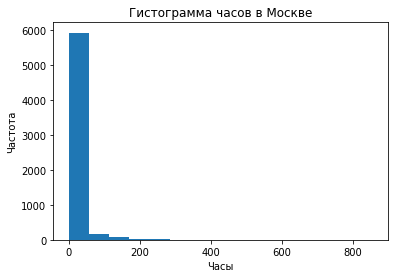

In [10]:
plt.hist(group_Moskva, bins=15)
plt.title('Гистограмма часов в Москве')
plt.xlabel('Часы')
plt.ylabel('Частота')
plt.show()

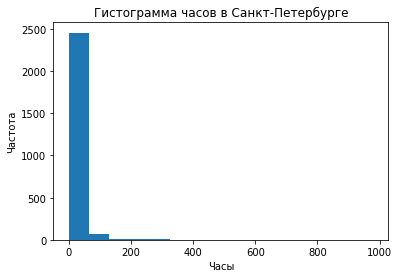

In [11]:
plt.hist(group_SPB, bins=15)
plt.title('Гистограмма часов в Санкт-Петербурге')
plt.xlabel('Часы')
plt.ylabel('Частота')
plt.show()

На графиках отмечается правосторонняя (положительная) асиметрия, что говорит вытянуты хвост вправа. 
Учитывая результаты, нам необходим тест Манни-Уитни, так как он более устойчив к выбросам, так как не использует абсолютные значения, а использует ранги.

Формулируем гипотезы: 

Нулевая гипотеза Н0: Средняя активность пользователей в Санкт-Петербурге не больше, чем в Москве

Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, чем в Москве, и это различие статистически значимо.

In [12]:
# Используем тест Манна-Уитни
alpha = 0.05
stat_mw, p_value_mw = mannwhitneyu(group_SPB, 
                                   group_Moskva, 
                                   alternative='greater')

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print("Нулевую гипотезу не отвергаем: средняя активность пользователей в часах в двух группах не различается.")
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print("Нулевую гипотезу отвергаем: средняя активность пользователей в Санкт-Петербурге больше, и это различие выражено.")

pvalue=0.08905943967440888 > 0.05
Нулевую гипотезу не отвергаем: средняя активность пользователей в часах в двух группах не различается.


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



В Москве зарегистрировано 6234 пользователя, общая длительность чтения или прослушивания составила: 6783,73 часа.
Максимальная  длительность чтения или прослушивания 857,2 часа. Имеет место быть отличие среднего и стандартного значения: стандартное 36.85 часов, среднее 10,88, что обусловлено выбросами, смещение вправо. 
В Санкт-Петербурге зарегистрировано 2550 пользователей, общая длительность чтения или прослушивания составила:  29561.36 часов.
Максимальная  длительность чтения или прослушивания 978,8 часа. Имеет место быть отличие среднего и стандартного значения: стандартное 39.7 часов, среднее 11,6, что обусловлено выбросами, смещение вправо. 
Анализ показывает большее число пользователей в Москве, но меньшую длительность чтения или прослушивания. В Санкт-Петербурге меньшее исло пользователей но пользователи провели больше времени за чтением или прослушиванием.

Явных дубликатов не выявлено. Выявлено 244 дубликата по puid. Анализ показывает факсацию  пользователей в обоих городах. Так как количество часов при этом разнится, можно предполагать  прочтение данного пользователя в обоих городах.

Используем для анализа t-тест. Альтернативная гипотеза H₁ нашла подтверждение: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Однако, распределение пользователей по группам неравномерно. В группе A пользователей больше и составляет 8130. в группе B 639 пользователей.
Группа А - жители Москвы
Группа В - жители СПБ


t-статистика: 0.8029283420019465, p-значение: 0.7889810586388323
уровень значимости = 0,05, p-значение составляет 0.7889, что значительно выше стандартного уровня значимости, значит альтернативная гипотеза нашла подтвеждение. 
Вероятно, культурные традиции и предпочтения жителей СПБ определяют большее внимание к чтению или прослушиванию.


# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Анализ поведения пользователей после внедрени нововй версии сайта. Повысится ли количество пользователей, которые совершат покупку после обновления сайта.

## 2. Загрузите данные, оцените их целостность.


In [13]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)
display(participants.head())
display(events.head())

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [14]:
# Выделение пользователей, участвующих в тесте
test_participants = participants[participants['ab_test']=='interface_eu_test'].copy()
print(test_participants)

                user_id group            ab_test   device
0      0002CE61FF2C4011     B  interface_eu_test      Mac
2      001064FEAAB631A1     A  interface_eu_test  Android
4      001E72F50D1C48FA     A  interface_eu_test      Mac
5      002412F1EB3F6E38     B  interface_eu_test      Mac
6      002540BE89C930FB     B  interface_eu_test  Android
...                 ...   ...                ...      ...
14519  FFE600EEC4BA7685     B  interface_eu_test  Android
14520  FFE7FC140521F5F6     A  interface_eu_test       PC
14521  FFEFC0E55C1CCD4F     A  interface_eu_test       PC
14523  FFF28D02B1EACBE1     B  interface_eu_test       PC
14524  FFF58BC33966EB51     A  interface_eu_test  Android

[10850 rows x 4 columns]


In [15]:
# Шаг 3: Проверка равномерности распределения пользователей по группам теста
group_counts = test_participants['group'].value_counts()
print("Распределение по группам:\n", group_counts)

Распределение по группам:
 B    5467
A    5383
Name: group, dtype: int64


In [16]:
# Наблюдаемые данные
n_total = test_participants['user_id'].count()  # Общее количество людей
n_A = test_participants[test_participants['group'] == 'A']['user_id'].count()  # Количество людей в группе A
n_B = test_participants[test_participants['group'] == 'B']['user_id'].count()  # Количество людей в группе B

# Ожидаемая пропорция для равномерного распределения
p_expected = 0.5

# Проведение Z-теста для пропорций
count = [n_A, n_B]  # Количество людей в каждой группе
nobs = [n_total, n_total]  # Общее количество наблюдений в каждой группе

# Применение пропорционного Z-теста
stat, p_value = proportions_ztest(count, nobs, value=p_expected)

# Вывод результатов
print(f"Статистика Z: {stat}")
print(f"P-значение: {p_value}")

# Проверка гипотезы
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Нулевая гипотеза отклоняется: пропорции различаются")
else:
    print("Нулевая гипотеза не отклоняется: пропорции не различаются")

Статистика Z: -74.79505762522876
P-значение: 0.0
Нулевая гипотеза отклоняется: пропорции различаются


Нулевая гипотеза отклоняется: пропорции различаются. Значение -74.795 указывает на то, что разница между средними значениями двух групп очень велика. Значение ниже нуля, что говорит о том, что среднее значение для группы А значительно меньше, чем для группы В.

In [17]:
# Группируем по user_id и выделяем количество уникальных user_id
user_groups = test_participants.groupby('user_id')['group'].nunique()

# Находим пользователей, участвующих в более чем одной группе
conflict_users = user_groups[user_groups > 1]

# Выводим результаты
if not conflict_users.empty:
    print("Найдены пользователи, участвующие в нескольких тестовых группах:")
    print(conflict_users)
else:
    print("Нет пользователей, участвующих одновременно в нескольких тестовых группах одного теста.")
conflict_users_count = conflict_users.count()
print("Число пользователей, участвующих одновременно в нескольких тестовых группах:\n", conflict_users_count)

Нет пользователей, участвующих одновременно в нескольких тестовых группах одного теста.
Число пользователей, участвующих одновременно в нескольких тестовых группах:
 0


In [18]:
# Фильтруем пользователей, которые находятся в группе B
group_b_users = participants[participants['group'] == 'B']

# Группируем по user_id и считаем количество уникальных тестов
user_groups_b = group_b_users.groupby('user_id')['ab_test'].nunique()

# Находим пользователей, участвующих в группе B в более чем одном тесте
conflict_users_b = user_groups_b[user_groups_b > 1]

# Выводим результаты
if not conflict_users_b.empty:
    print("Найдены пользователи, участвующие в группе B одновременно в нескольких тестах:")
    print(conflict_users_b)
else:
    print("Нет пользователей, участвующих одновременно в группе B в нескольких тестах.")

conflict_users_count_b = conflict_users_b.count()
print("Число пользователей, участвующих одновременно в группе B в нескольких тестах:\n", conflict_users_count_b)

Найдены пользователи, участвующие в группе B одновременно в нескольких тестах:
user_id
067D05BD30F04F2E    2
0A0141A363E2E051    2
0C2E77C6A381704A    2
0FBF679EA1340786    2
115ABCFDBDDB5950    2
                   ..
F8564F547AFFC0B9    2
FC2DA0D7EF375B27    2
FE8F9858BBE502D9    2
FEA0C585A53E7027    2
FFF28D02B1EACBE1    2
Name: ab_test, Length: 116, dtype: int64
Число пользователей, участвующих одновременно в группе B в нескольких тестах:
 116


 Число пользователей, участвующих одновременно в группе B в нескольких тестах: 116. Удалим их.

In [19]:
# Удаляем конфликтующих пользователей из test_participants
cleaned_participants = test_participants[~test_participants['user_id'].isin(conflict_users_b.index)]

conflict_users_count_b = conflict_users_b.count()
print(f'Число пользователей в test_participants: {test_participants["user_id"].count()}')
print(f'Число пользователей в conflict_users_count_b: {cleaned_participants["user_id"].count()}')

Число пользователей в test_participants: 10850
Число пользователей в conflict_users_count_b: 10734


3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [20]:
print(events)

                 user_id            event_dt  \
0                 GLOBAL 2020-12-01 00:00:00   
1       CCBE9E7E99F94A08 2020-12-01 00:00:11   
2                 GLOBAL 2020-12-01 00:00:25   
3       CCBE9E7E99F94A08 2020-12-01 00:00:33   
4       CCBE9E7E99F94A08 2020-12-01 00:00:52   
...                  ...                 ...   
787281  1A655C280B064708 2020-12-31 23:57:44   
787282  B77B2F4BCA134618 2020-12-31 23:58:23   
787283            GLOBAL 2020-12-31 23:58:30   
787284  B12AD1623E494FAD 2020-12-31 23:58:34   
787285  5456977474344433 2020-12-31 23:59:48   

                              event_name      details  
0       End of Black Friday Ads Campaign  ZONE_CODE15  
1                           registration          0.0  
2                           product_page          NaN  
3                                  login          NaN  
4                           product_page          NaN  
...                                  ...          ...  
787281                      pro

In [21]:
# Соединение таблиц через INNER по user_id
events_participants_df = pd.merge(events, cleaned_participants, on='user_id', how='inner')
print(events_participants_df)
print("События, связанные с пользователями, участвующими в тесте:")
print(events_participants_df['event_name'].unique())

                user_id            event_dt    event_name details group  \
0      5F506CEBEDC05D30 2020-12-06 14:10:01  registration     0.0     A   
1      5F506CEBEDC05D30 2020-12-07 01:25:14         login     NaN     A   
2      5F506CEBEDC05D30 2020-12-07 01:25:47         login     NaN     A   
3      5F506CEBEDC05D30 2020-12-09 12:40:49         login     NaN     A   
4      5F506CEBEDC05D30 2020-12-09 12:40:49  product_page     NaN     A   
...                 ...                 ...           ...     ...   ...   
79061  16CCB1C8C4DCF1AF 2020-12-23 23:50:29  registration     0.0     A   
79062  16CCB1C8C4DCF1AF 2020-12-23 23:55:52         login     NaN     A   
79063  2DDC948BD76ABC57 2020-12-24 21:57:10  registration   -4.29     B   
79064  2DDC948BD76ABC57 2020-12-24 21:58:49         login     NaN     B   
79065  2DDC948BD76ABC57 2020-12-24 22:00:40  product_page     NaN     B   

                 ab_test  device  
0      interface_eu_test  iPhone  
1      interface_eu_test  iPh

In [22]:
# Проверка на наличие дубликатов
events_participants_duplicates = events_participants_df.duplicated().sum()
print("Количество дубликатов:")
print(events_participants_duplicates)

Количество дубликатов:
6131


In [23]:
# Удалим дубликаты 
events_participants_no_duplicates = events_participants_df.drop_duplicates()
print("\nDataFrame без дубликатов:")
print(events_participants_no_duplicates)


DataFrame без дубликатов:
                user_id            event_dt    event_name details group  \
0      5F506CEBEDC05D30 2020-12-06 14:10:01  registration     0.0     A   
1      5F506CEBEDC05D30 2020-12-07 01:25:14         login     NaN     A   
2      5F506CEBEDC05D30 2020-12-07 01:25:47         login     NaN     A   
3      5F506CEBEDC05D30 2020-12-09 12:40:49         login     NaN     A   
4      5F506CEBEDC05D30 2020-12-09 12:40:49  product_page     NaN     A   
...                 ...                 ...           ...     ...   ...   
79061  16CCB1C8C4DCF1AF 2020-12-23 23:50:29  registration     0.0     A   
79062  16CCB1C8C4DCF1AF 2020-12-23 23:55:52         login     NaN     A   
79063  2DDC948BD76ABC57 2020-12-24 21:57:10  registration   -4.29     B   
79064  2DDC948BD76ABC57 2020-12-24 21:58:49         login     NaN     B   
79065  2DDC948BD76ABC57 2020-12-24 22:00:40  product_page     NaN     B   

                 ab_test  device  
0      interface_eu_test  iPhone  
1 

In [24]:
# Проверка на наличие дубликатов
events_participants_non_duplicates = events_participants_no_duplicates.duplicated().sum()
print("Количество дубликатов:")
print(events_participants_non_duplicates)

Количество дубликатов:
0


Пользователи, которые участвую с тесте, совершали след.действия:'registration' 'login' 'product_page' 'product_cart' 'purchase'. 

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [25]:
# Получаем даты регистрации
registration_events = events_participants_no_duplicates[
    events_participants_no_duplicates['event_name'] == 'registration'
][['user_id', 'event_dt']].copy()

# Переименовываем столбец 'event_dt' в 'registration_dt'
registration_events = registration_events.rename(columns={'event_dt': 'registration_dt'})

# Удаляем дубликаты, оставляя только первую дату регистрации для каждого пользователя
registration_events = registration_events.drop_duplicates(subset='user_id')

# Проверяем, что столбец 'registration_dt' существует
print(registration_events)

                user_id     registration_dt
0      5F506CEBEDC05D30 2020-12-06 14:10:01
6      51278A006E918D97 2020-12-06 14:37:25
11     A0C1E8EFAD874D8B 2020-12-06 17:20:22
14     275A8D6254ACF530 2020-12-06 19:36:54
30     0B704EB2DC7FCA4B 2020-12-06 19:42:20
...                 ...                 ...
79044  52B5A81EFC31AF1D 2020-12-23 23:44:45
79051  B1D88FBD4BA58E1B 2020-12-23 23:44:47
79055  38CA3A3C4FE3FEFD 2020-12-23 23:47:47
79061  16CCB1C8C4DCF1AF 2020-12-23 23:50:29
79063  2DDC948BD76ABC57 2020-12-24 21:57:10

[10734 rows x 2 columns]


In [26]:
# Группируем по user_id и находим минимальную дату регистрации
registration_events['registration_dt'] = pd.to_datetime(registration_events['registration_dt'])
min_registration_dates = registration_events.groupby('user_id')['registration_dt'].min().reset_index()

# Определяем максимальную дату регистрации
max_registration_date = pd.to_datetime('2020-12-31')

# Проверяем, есть ли даты регистрации позже указанной даты
invalid_registration_users = min_registration_dates[min_registration_dates['registration_dt'] > max_registration_date]

# Условие для проверки наличия пользователей с недопустимой датой регистрации
if not invalid_registration_users.empty:
    print("Найдены пользователи с датой регистрации позже 2020-12-31:")
    print(invalid_registration_users)
else:
    print('Дата регистрации пользователей находится в диапазоне, описанном в ТЗ: крайняя дата регистрации - 2020-12-31')

Дата регистрации пользователей находится в диапазоне, описанном в ТЗ: крайняя дата регистрации - 2020-12-31


Дата регистрации пользователей находится в диапазоне, описанном в ТЗ: крайняя дата регистрации - 2020-12-31
Значит, условия тех.задания выполнены.

In [27]:
# Преобразуем даты в формат datetime
#registration_events['registration_dt'] = pd.to_datetime(registration_events['registration_dt'])

In [28]:
# Объединяем  registration_events с основным events_participants_no_duplicates по user_id
events_participants_no_duplicates = events_participants_no_duplicates.merge(registration_events, on='user_id', how='left')

# Рассчитываем время совершения события после регистрации
events_participants_no_duplicates['time_since_registration'] = (events_participants_no_duplicates['event_dt'] - events_participants_no_duplicates['registration_dt']).dt.days

print(events_participants_no_duplicates)

                user_id            event_dt    event_name details group  \
0      5F506CEBEDC05D30 2020-12-06 14:10:01  registration     0.0     A   
1      5F506CEBEDC05D30 2020-12-07 01:25:14         login     NaN     A   
2      5F506CEBEDC05D30 2020-12-07 01:25:47         login     NaN     A   
3      5F506CEBEDC05D30 2020-12-09 12:40:49         login     NaN     A   
4      5F506CEBEDC05D30 2020-12-09 12:40:49  product_page     NaN     A   
...                 ...                 ...           ...     ...   ...   
72930  16CCB1C8C4DCF1AF 2020-12-23 23:50:29  registration     0.0     A   
72931  16CCB1C8C4DCF1AF 2020-12-23 23:55:52         login     NaN     A   
72932  2DDC948BD76ABC57 2020-12-24 21:57:10  registration   -4.29     B   
72933  2DDC948BD76ABC57 2020-12-24 21:58:49         login     NaN     B   
72934  2DDC948BD76ABC57 2020-12-24 22:00:40  product_page     NaN     B   

                 ab_test  device     registration_dt  time_since_registration  
0      interface_eu

In [29]:
# Оставляем только события, которые произошли в течение первых семи дней после регистрации. Создаем копию
result_events = events_participants_no_duplicates[events_participants_no_duplicates['time_since_registration'] >= 0].copy()

In [30]:
result_events = result_events[result_events['time_since_registration'] <= 7]  # События до 7 дней

In [31]:
# Выводим результат
print("События, произошедшие в течение первых семи дней после регистрации:\n", result_events['event_name'].unique())
print("События, произошедшие в течение первых семи дней после регистрации:\n", result_events)

События, произошедшие в течение первых семи дней после регистрации:
 ['registration' 'login' 'product_page' 'product_cart' 'purchase']
События, произошедшие в течение первых семи дней после регистрации:
                 user_id            event_dt    event_name details group  \
0      5F506CEBEDC05D30 2020-12-06 14:10:01  registration     0.0     A   
1      5F506CEBEDC05D30 2020-12-07 01:25:14         login     NaN     A   
2      5F506CEBEDC05D30 2020-12-07 01:25:47         login     NaN     A   
3      5F506CEBEDC05D30 2020-12-09 12:40:49         login     NaN     A   
4      5F506CEBEDC05D30 2020-12-09 12:40:49  product_page     NaN     A   
...                 ...                 ...           ...     ...   ...   
72930  16CCB1C8C4DCF1AF 2020-12-23 23:50:29  registration     0.0     A   
72931  16CCB1C8C4DCF1AF 2020-12-23 23:55:52         login     NaN     A   
72932  2DDC948BD76ABC57 2020-12-24 21:57:10  registration   -4.29     B   
72933  2DDC948BD76ABC57 2020-12-24 21:58:49   

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

Мы ожидаем увеличение конверсии минимум до 33%, нам потребуется Размер выборки: 3692 пользователя на каждую для получения статистически значимых результатов.
У нас Распределение по группам: больше.
Следовательно, размер выборки в тесте  достаточный

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [32]:
group_purchase = result_events[result_events['event_name'].isin(['registration', 'purchase'])].pivot_table(
    index='group', 
    columns='event_name', 
    values='user_id', 
    aggfunc='nunique'
).reset_index()
print("Распределение по группам:\n", group_purchase)

Распределение по группам:
 event_name group  purchase  registration
0              A      1542          5383
1              B      1665          5351


В группе A состоит 5383 пользователя, из них 1542 совершили покупку
В группе В состоит 5351 пользователь, из них 1665 совершили покупку 

In [33]:
group_purchase['conversion'] = round((group_purchase['purchase'] / group_purchase['registration']), 2)
print(group_purchase[['group', 'conversion']])
rasnica = round((group_purchase['conversion'][0] - group_purchase['conversion'][1]), 2)
print(rasnica)

event_name group  conversion
0              A        0.29
1              B        0.31
-0.02


Конверсия в группе А составила 0,29, в группе В 0,31. Прирост составил 2 процентный пункта, что имеет незначительный результат

Анализ показал: размер выборки пользователей, необходимый для проведения тестирования с достоверностью теста 95%, мощностью теста 80% и базовым показателем места конверсии — 30%, достаточный.
В группе A состоит 5383 пользователя, из них 1542 совершили покупку
В группе В состоит 5351 пользователь, из них 1665 совершили покупку
Статистичекий анализ с помощью Z-теста показал, что пропорции действительно различаются между собой. Значение -74.795 указывает на то, что разница между средними значениями двух групп очень велика, и среднее значение для группы А значительно меньше, чем для группы В.
В ходе анализа выявлено 116 пользователей, которые участвовали сразу в 2х тестах и находились в группе В. Данный пользователи были удалены из тестовой группы и не учитывались при расчетах. Проверены условиях тех.задания. Временной период регистрации пользователей сооответсвует тех.заданию. Однако, выявлены пользователи, которые были зарегистрированы неоднократно. В дальнейшем анализе данный факт был учтен.
События, произошедшие в течение первых семи дней после регистрации:'registration' 'login' 'product_page' 'product_cart' 'purchase'.

Конверсия в группе А составила 0,29, в группе В 0,31. Прирост составил  2 процентных пункта, что имеет незначительный результат. 

При поведениии А\В тестирования установлено: достичь увеличения конверсии минимум на 3 процента не удалось, так как статистический тест показал отсутствие значимой разницы в конверсии.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Формулируем гипотезы: 

Н0 нулева гипотеза: доли зарегистрированных пользователей, совершивших покупку с обновленным интефейсом, не больше зарегистрированных пользователей, совершивших покупку с не обновленным интерфейсом.

Н1 альтернаивная гипотеза: доли зарегистрированных пользователей, совершивших покупку с обновленным интефейсом больше, чем доля зарегистрированных пользователей с не обновленным интерфейсом,  и это различие статистически значимо.

In [34]:
# Успехи в группе A
m_a = result_events.loc[(result_events['group'] == 'A') & (result_events['event_name'] == 'purchase'), 'user_id'].nunique()  
# Общее количество в группе A
n_a = result_events.loc[result_events['group'] == 'A', 'user_id'].nunique()     
# Успехи в группе B
m_b = result_events.loc[(result_events['group'] == 'B') & (result_events['event_name'] == 'purchase'), 'user_id'].nunique()  
# Общее количество в группе B
n_b = result_events.loc[result_events['group'] == 'B', 'user_id'].nunique()   
# Конверсии
p_a = m_a / n_a
p_b = m_b / n_b

# Объединенная пропорция
p = (m_a + m_b) / (n_a + n_b)


In [35]:
# Пример данных
#success_a = 100  # Успехи в группе A
#success_b = 80    # Успехи в группе B
#n_a = 1000        # Общее количество участников в группе A
#n_b = 1000        # Общее количество участников в группе B

In [36]:
if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

Предпосылка о достаточном количестве данных выполняется!


In [37]:
alpha = 0.05 

stat_ztest, p_value_ztest = proportions_ztest(
[m_b, m_a],
[n_b, n_a],
alternative='larger' 
)
p_value_ztest


if p_value_ztest > alpha:
    print(f'pvalue={p_value_ztest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!доли зарегистрированных пользователей, совершивших покупку с обновленным интефейсом не больше, чем доля зарегистрированных пользователей с не обновленным интерфейсом')
else:
    print(f'pvalue={p_value_ztest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! доли зарегистрированных пользователей, совершивших покупку с обновленным интефейсом больше, чем доля зарегистрированных пользователей с не обновленным интерфейсом')
print(stat_ztest)

pvalue=0.0025921408302302393 < 0.05
Нулевая гипотеза не находит подтверждения! доли зарегистрированных пользователей, совершивших покупку с обновленным интефейсом больше, чем доля зарегистрированных пользователей с не обновленным интерфейсом
2.7953545980553796


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

Цель пректа: Анализ поведения пользователей после внедрени новой версии сайта. Повысится ли количество пользователей, которые совершат покупку после обновления сайта.
Гипотеза заключается в следующем: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта

Анализ показал: размер выборки пользователей, необходимый для проведения тестирования с достоверностью теста 95%, мощностью теста 80% и базовым показателем места конверсии — 30%, достаточный. В группе A состоит 5383 пользователя, из них 1542 совершили покупку В группе В состоит 5351 пользователь, из них 1665 совершили покупку Статистичекий анализ с помощью Z-теста показал, что пропорции действительно различаются между собой. Значение -74.795 указывает на то, что разница между средними значениями двух групп очень велика, и среднее значение для группы А значительно меньше, чем для группы В. В ходе анализа выявлено 116 пользователей, которые участвовали сразу в 2х тестах и находились в группе В. Данный пользователи были удалены из тестовой группы и не учитывались при расчетах. Проверены условиях тех.задания. Временной период регистрации пользователей сооответсвует тех.заданию. Однако, выявлены пользователи, которые были зарегистрированы неоднократно. В дальнейшем анализе данный факт был учтен.
Конверсия в группе А составила 0,29, в группе В 0,31. Прирост составил 2 процентных пункта, что имеет незначительный результат. 
При поведениии А\В тестирования установлено: достичь увеличения конверсии минимум на 3 процента не удалось, так как статистический тест показал отсутствие значимой разницы в конверсии.
Анализ Zпропорций показывает, что pvalue=0.0025921408302302393 < 0.05
Доли зарегистрированных пользователей, совершивших покупку с обновленным интефейсом больше, чем доля зарегистрированных пользователей с необновленным интерфейсом
2.7953545980553796
Учитывая, что достичь увеличения конверсии минимум на 3 процента не удалось, рекомендовано пересмотреть число пользователей, участвующих в тесте. Либо увеличить период тестирования. 